In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
!ls

交通出行优化赛题数据集(交叉口流量).csv
交通出行优化赛题数据集说明 .pdf


In [3]:
df = pd.read_csv('交通出行优化赛题数据集(交叉口流量).csv',encoding="GBK")

In [4]:
df.head()

,junction_name,junction_approach,veh_turn_dir,phase_id,timestamp,volume
0,青龙港路-民乐路,A,l,7,230612000000,0
1,青龙港路-民乐路,A,r,13,230612000000,3
2,青龙港路-民乐路,B,r,14,230612000000,3
3,青龙港路-民乐路,B,s,2,230612000000,11
4,青龙港路-民乐路,D,l,10,230612000000,6


In [5]:
df.junction_name.value_counts()

民乐路-南天成路     23940
北天成路-吴韵路     23940
水景路-南天成路     23940
城通路-南天成路     23940
青龙港路-相城大道    23940
南天成路-吴韵路     23940
青龙港路-民乐路     11970
青龙港路-汇流街     11970
采莲路-青龙港路     11970
青龙港路-吴韵路     11970
水景路-青龙港路     11970
青龙港路-城通路     11970
青龙港路-云集街     11970
Name: junction_name, dtype: int64

In [6]:
df.junction_approach.value_counts()

B    63840
D    63840
A    59850
C    39900
Name: junction_approach, dtype: int64

In [7]:
df.veh_turn_dir.value_counts()

l    75810
r    75810
s    75810
Name: veh_turn_dir, dtype: int64

In [8]:
df[df.veh_turn_dir == 's'].phase_id.value_counts()

2    25935
4    25935
1    11970
3    11970
Name: phase_id, dtype: int64

In [8]:
df.timestamp.dtypes

dtype('int64')

In [9]:
df.head()

,junction_name,junction_approach,veh_turn_dir,phase_id,timestamp,volume
0,青龙港路-民乐路,A,l,7,230612000000,0
1,青龙港路-民乐路,A,r,13,230612000000,3
2,青龙港路-民乐路,B,r,14,230612000000,3
3,青龙港路-民乐路,B,s,2,230612000000,11
4,青龙港路-民乐路,D,l,10,230612000000,6


In [10]:
df['timestamp'] = int(20e12)+df['timestamp']
df['timestamp'] = df['timestamp'].astype('string')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [11]:
df.tail()

,junction_name,junction_approach,veh_turn_dir,phase_id,timestamp,volume
227425,青龙港路-云集街,A,r,13,2023-07-02 23:45:00,1
227426,青龙港路-云集街,B,r,14,2023-07-02 23:45:00,0
227427,青龙港路-云集街,B,s,2,2023-07-02 23:45:00,6
227428,青龙港路-云集街,D,l,10,2023-07-02 23:45:00,0
227429,青龙港路-云集街,D,s,4,2023-07-02 23:45:00,2


In [12]:
df[['junction_name','junction_approach','veh_turn_dir','phase_id']].value_counts()

junction_name  junction_approach  veh_turn_dir  phase_id
北天成路-吴韵路       A                  l             7           1995
青龙港路-城通路       A                  r             13          1995
青龙港路-吴韵路       D                  s             4           1995
                                  l             10          1995
               B                  s             2           1995
                                                            ... 
城通路-南天成路       D                  r             16          1995
                                  l             10          1995
               C                  s             3           1995
                                  r             15          1995
青龙港路-相城大道      D                  s             4           1995
Length: 114, dtype: int64

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227430 entries, 0 to 227429
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   junction_name      227430 non-null  object        
 1   junction_approach  227430 non-null  object        
 2   veh_turn_dir       227430 non-null  object        
 3   phase_id           227430 non-null  int64         
 4   timestamp          227430 non-null  datetime64[ns]
 5   volume             227430 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 10.4+ MB


In [14]:
df.set_index('timestamp',inplace = True)

In [38]:
df['phase_id'] = df['phase_id'].astype('string')

In [15]:
df.head()

,junction_name,junction_approach,veh_turn_dir,phase_id,volume
timestamp,,,,,
2023-06-12,青龙港路-民乐路,A,l,7,0
2023-06-12,青龙港路-民乐路,A,r,13,3
2023-06-12,青龙港路-民乐路,B,r,14,3
2023-06-12,青龙港路-民乐路,B,s,2,11
2023-06-12,青龙港路-民乐路,D,l,10,6


In [33]:
df.index

DatetimeIndex(['2023-06-12 00:00:00', '2023-06-12 00:00:00',
               '2023-06-12 00:00:00', '2023-06-12 00:00:00',
               '2023-06-12 00:00:00', '2023-06-12 00:00:00',
               '2023-06-12 00:00:00', '2023-06-12 00:00:00',
               '2023-06-12 00:00:00', '2023-06-12 00:00:00',
               ...
               '2023-07-02 23:45:00', '2023-07-02 23:45:00',
               '2023-07-02 23:45:00', '2023-07-02 23:45:00',
               '2023-07-02 23:45:00', '2023-07-02 23:45:00',
               '2023-07-02 23:45:00', '2023-07-02 23:45:00',
               '2023-07-02 23:45:00', '2023-07-02 23:45:00'],
              dtype='datetime64[ns]', name='timestamp', length=227430, freq=None)

In [62]:
##give one road as example of 1 day data
tmp = df[(df.phase_id == '2')&(df.index <'2023-06-13')]


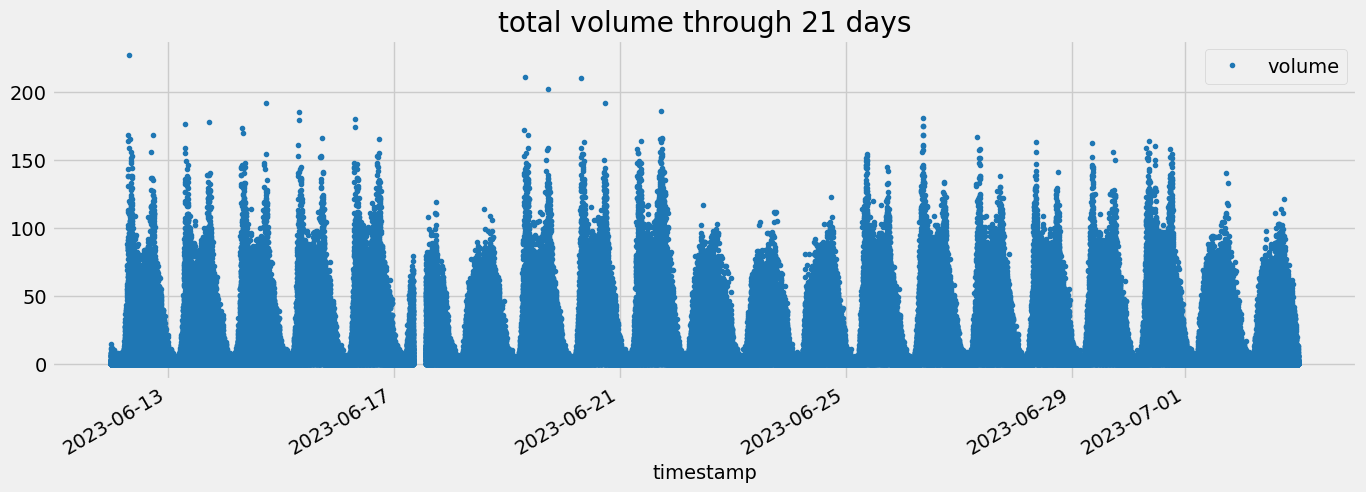

In [39]:
df[['volume']].plot(
        style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='total volume through 21 days')
plt.show()

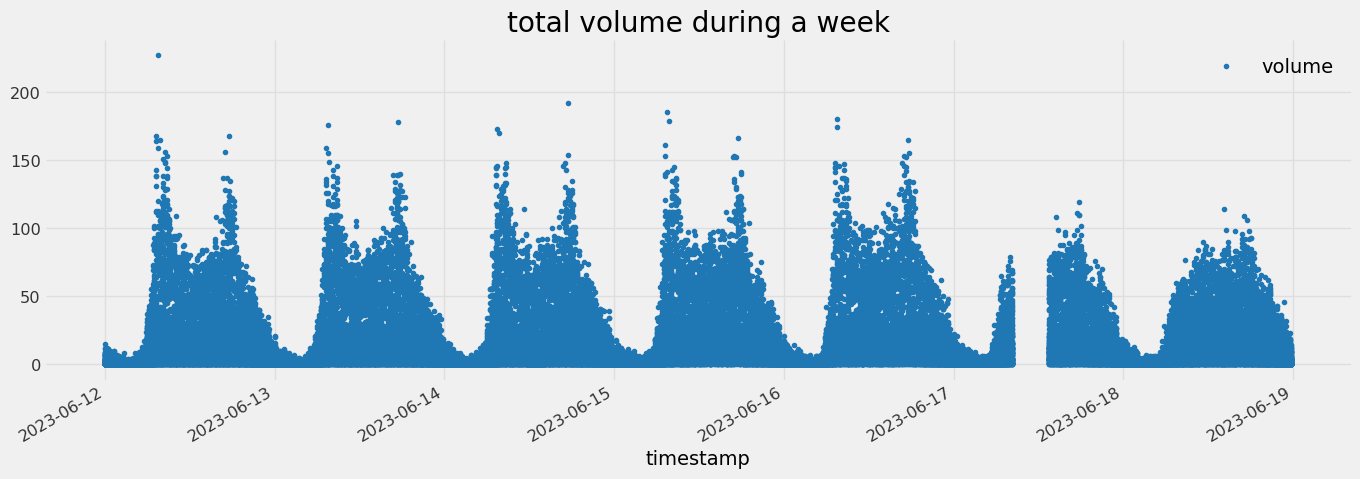

In [71]:
df[df.index < '2023-06-19'][['volume']].plot(
        style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='total volume during a week')
plt.show()

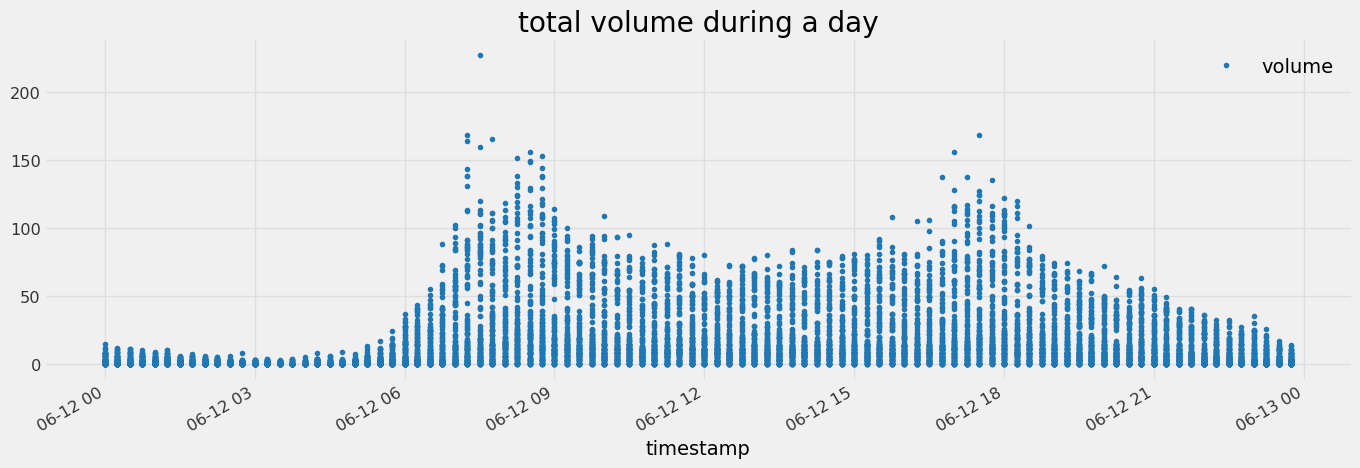

In [69]:
df[df.index < '2023-06-13'][['volume']].plot(
        style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='total volume during a day')
plt.show()

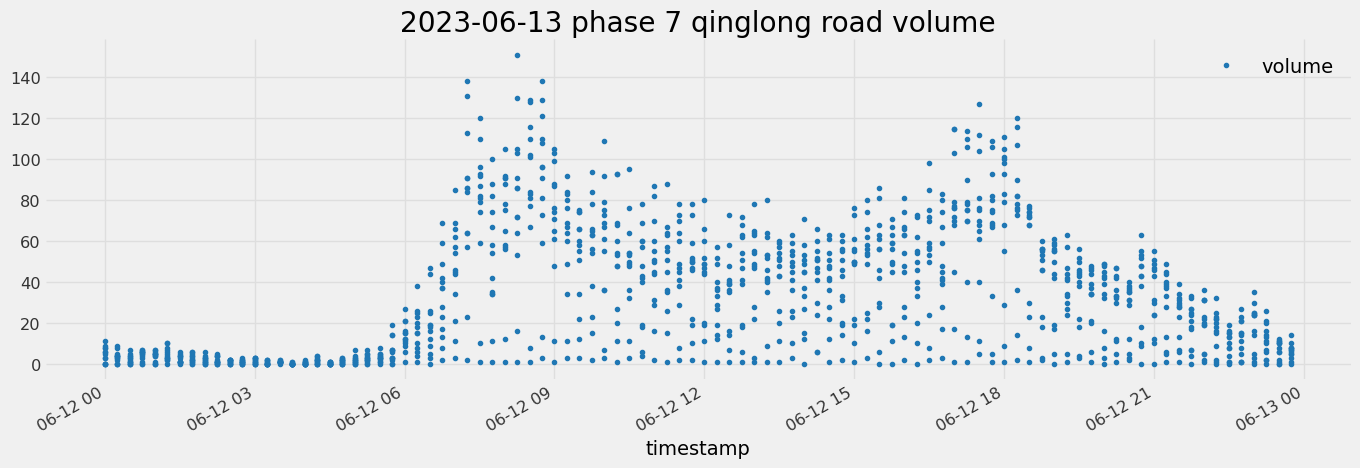

In [63]:
tmp[['volume']].plot(
        style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='2023-06-13 phase 7 qinglong road volume')
plt.show()

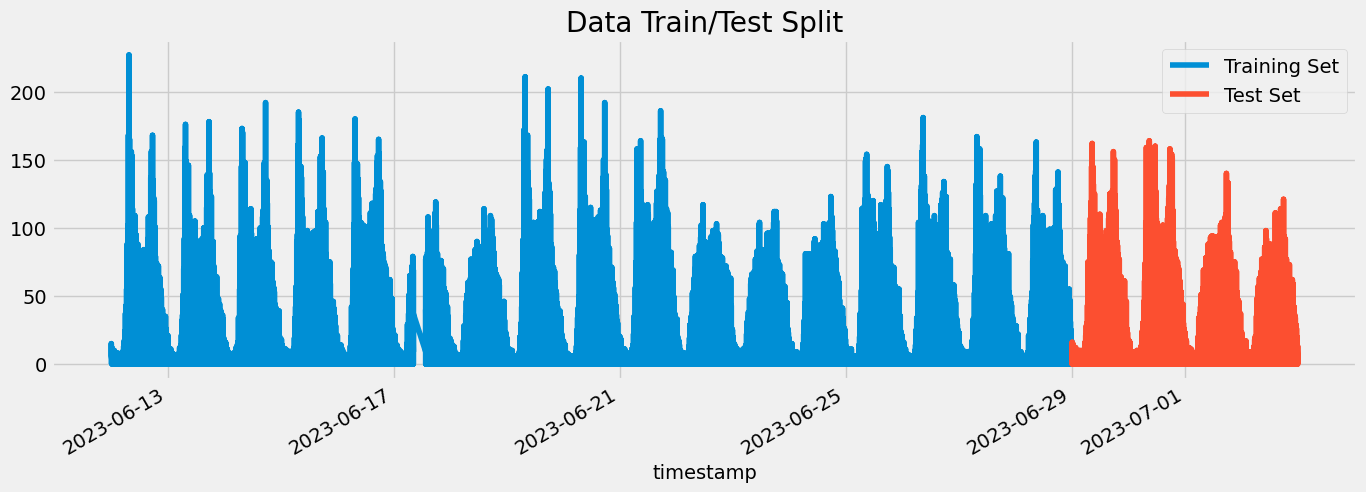

In [43]:
train = df.loc[df.index < '2023-06-29']
test = df.loc[df.index >= '2023-06-29']

fig, ax = plt.subplots(figsize=(15, 5))
train[['volume']].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test[['volume']].plot(ax=ax, label='Test Set')
#ax.axvline('2023-06-29 00:00:00', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

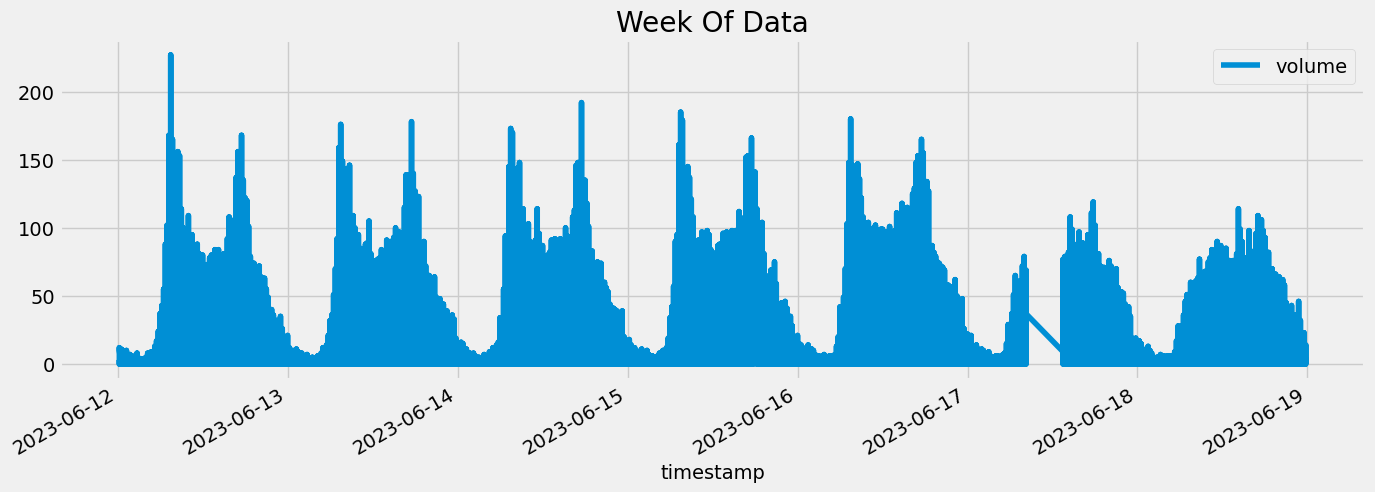

In [44]:
df.loc[(df.index > '2023-06-12') & (df.index < '2023-06-19')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

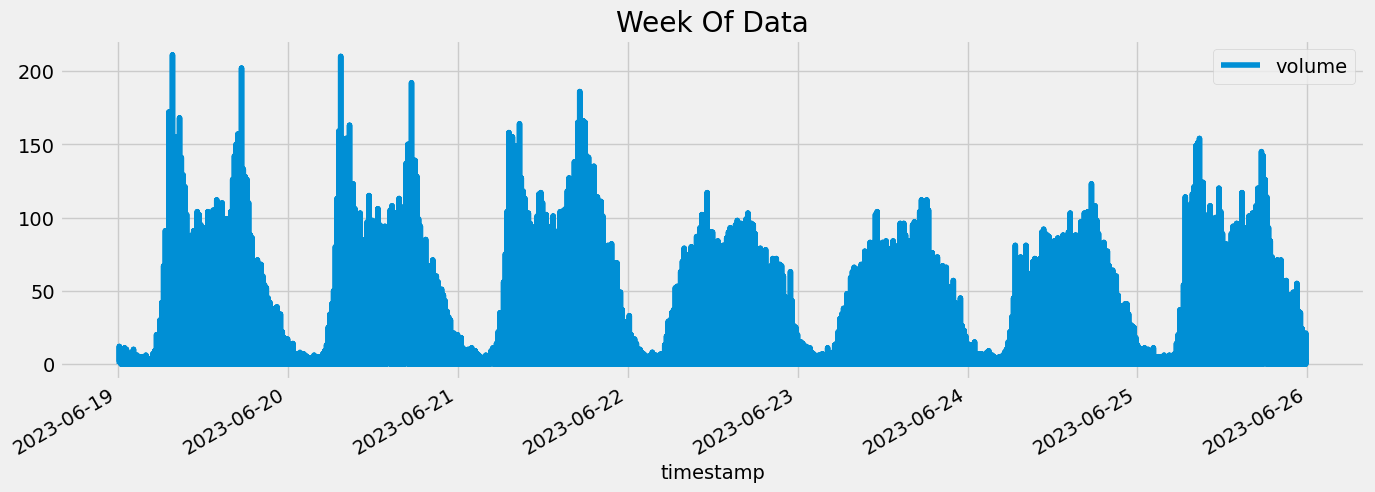

In [45]:
##端午节
df.loc[(df.index > '2023-06-19') & (df.index < '2023-06-26')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [46]:
df.head()

,junction_name,junction_approach,veh_turn_dir,phase_id,volume
timestamp,,,,,
2023-06-12,青龙港路-民乐路,A,l,7,0
2023-06-12,青龙港路-民乐路,A,r,13,3
2023-06-12,青龙港路-民乐路,B,r,14,3
2023-06-12,青龙港路-民乐路,B,s,2,11
2023-06-12,青龙港路-民乐路,D,l,10,6


In [64]:
## feature engineering
def create_time_based_features(df):
    """create time features based on time series index

    Args:
        df (_type_): _description_
    """
    df = df.copy()
    df['hour'] = df.index.hour
    ## create go to work and go back home peak feature
    df['go_to_work_peak'] = ((df['hour']>=7)&(df['hour']<=9)).astype('int')
    df['go_back_home_peak'] = ((df['hour']>=17)&(df['hour']<=19)).astype('int')
    df['day_of_week'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    #df['year'] = df.index.year
    df['day_of_year'] = df.index.dayofyear
    df['day_of_month'] = df.index.day
    df['week_of_year'] = df.index.isocalendar().week
    df['is_weekend'] = (df.index.dayofweek > 4).astype('int')
    return df
    

In [65]:
df = create_time_based_features(df)

In [68]:
df[df.go_to_work_peak == 1]

,junction_name,junction_approach,veh_turn_dir,phase_id,volume,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,day_of_week,day_of_year,day_of_month,week_of_year,is_weekend,go_to_work_peak,go_back_home_peak
timestamp,,,,,,,,,,,,,,,,,,,
2023-06-12 07:00:00,青龙港路-民乐路,A,l,7,12,7,0,2,6,163,12,24,0,163,12,24,0,1,0
2023-06-12 07:00:00,青龙港路-民乐路,A,r,13,60,7,0,2,6,163,12,24,0,163,12,24,0,1,0
2023-06-12 07:00:00,青龙港路-民乐路,B,r,14,13,7,0,2,6,163,12,24,0,163,12,24,0,1,0
2023-06-12 07:00:00,青龙港路-民乐路,B,s,2,85,7,0,2,6,163,12,24,0,163,12,24,0,1,0
2023-06-12 07:00:00,青龙港路-民乐路,D,l,10,12,7,0,2,6,163,12,24,0,163,12,24,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 09:45:00,青龙港路-云集街,A,r,13,5,9,6,3,7,183,2,26,6,183,2,26,1,1,0
2023-07-02 09:45:00,青龙港路-云集街,B,r,14,4,9,6,3,7,183,2,26,6,183,2,26,1,1,0
2023-07-02 09:45:00,青龙港路-云集街,B,s,2,32,9,6,3,7,183,2,26,6,183,2,26,1,1,0


In [51]:
##forecasting with tabular data with darts
from darts import TimeSeries
from darts.models import RegressionModel
from sklearn.linear_model import LinearRegression


In [ ]:
y = TimeSeries.from_series(df['volume'])
features = ['junction_name','junction_approach','veh_turn_dir','phase_id']